In [1]:
!pip install emoji

### Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('../Dataset/fake_news_classification_mal_train.csv')
test_df = pd.read_excel("../Dataset/fake_test.xlsx")

In [4]:
with pd.option_context('display.max_colwidth', 0):
    display(train_df.sample(n=5))

,ID,News,Label
719,FAKE_MAL_TR_0720,ക്രിക്കറ്റ് താരം ഡേവിഡ് മില്ലറുടെ മകള്‍ കാന്‍സര്‍ ബാധിച്ചു മരിച്ചു,FALSE
184,FAKE_MAL_TR_0185,ഇക്കഴിഞ്ഞ ദിവസം വയനാട് സന്ദര്‍ശിക്കാനെത്തിയ രാഹുല്‍ ഗാന്ധിയുടെ ചിത്രം.,MOSTLY FALSE
75,FAKE_MAL_TR_0076,409 വര്‍ഷം പഴക്കമുള്ള ശബരിമല ക്ഷേത്രത്തിന്റെ ചിത്രം. ഈ ചിത്രമെടുത്ത ശേഷമാണ് ബ്രിട്ടീഷ് ഈസ്റ്റ് ഇന്ത്യാ കമ്പനി അവരുടെ നാണയത്തില്‍ അയ്യപ്പന്റെ ചിത്രം ഉള്‍പ്പെടുത്തിയത്.,FALSE
609,FAKE_MAL_TR_0610,പാക് പേസര്‍ മുഹമ്മദ് ഇര്‍ഫാന്‍ കാര്‍ അപകടത്തില്‍ മരിച്ചതായി വ്യാജ പ്രചാരണം,FALSE
738,FAKE_MAL_TR_0739,തൃക്കാക്കരയിലെ വ്യാജ വീഡിയോ വിവാദത്തില്‍ പിടിയിലായത് സിപിഎം പ്രവര്‍ത്തകന്‍,FALSE


In [5]:
with pd.option_context('display.max_colwidth', 0):
    display(test_df.sample(n=5))

,S.no,News,Label
36,FAKE_MAL_TE_0037,പ്രധാനമന്ത്രി നരേന്ദ്ര മോദി കസേരയില്‍ ഇരിക്കുമ്പോള്‍ രാഷ്‌ട്രപതി രാമനാഥ് കോവിന്ദിനെ തന്‍റെ പിന്നില്‍ തൃശൂലം പിടിച്ച് നിറുത്തി,False
154,FAKE_MAL_TE_0155,വിഴിഞ്ഞത്തേക്കാൾ വലിയ തുറമുഖം തൃശ്ശൂരിൽ യാഥാർത്ഥ്യമാക്കുമെന്ന് സുരേഷ് ഗോപി,MOSTLY FALSE
161,FAKE_MAL_TE_0162,"സൗജന്യ ഭക്ഷ്യകിറ്റ് സർക്കാരിന് ബാധ്യത, അടുത്ത സർക്കാരിന് ഇത് തുടരാനാകില്ല എന്ന് എൽ.ഡി.എഫ്‌ കൺവീനർ എ. വിജയരാഘവൻ പറഞ്ഞതായി ഏഷ്യാനെറ്റ്‌ ന്യൂസ്‌ റിപ്പോർട്ട്‌.",MOSTLY FALSE
172,FAKE_MAL_TE_0173,കേരള സര്‍ക്കാര്‍ പന്നിവളര്‍ത്തല്‍ നിരോധിച്ചു.,MOSTLY FALSE
78,FAKE_MAL_TE_0079,ചൈന മനുഷ്യന്‍റെ അതെ ഗുണഗണങ്ങളോടുകൂടിയ കൃത്രിമ സ്ത്രീയെ നിര്‍മ്മിച്ചു,False


In [6]:
train_df.groupby("Label").size()

Label
FALSE           1220
FALSE            166
HALF TRUE        162
MOSTLY FALSE     295
PARTLY FALSE      57
dtype: int64

In [43]:
test_df.groupby("Label").size()

Label
False           100
HALF TRUE        37
MOSTLY FALSE     56
PARTLY FALSE      7
dtype: int64

In [44]:
train_df.shape , test_df.shape

((1900, 3), (200, 3))

In [7]:
train_df['Label'].unique()

array(['FALSE     ', 'HALF TRUE', 'FALSE', 'MOSTLY FALSE', 'PARTLY FALSE'],
      dtype=object)

In [8]:
train_df['Label'].unique()

array(['FALSE     ', 'HALF TRUE', 'FALSE', 'MOSTLY FALSE', 'PARTLY FALSE'],
      dtype=object)

In [9]:
train_df.loc[train_df['Label'] == 'FALSE     ', 'Label'] = 'FALSE'

In [10]:
train_df['Label'].unique()

array(['FALSE', 'HALF TRUE', 'MOSTLY FALSE', 'PARTLY FALSE'], dtype=object)

In [11]:
train_df.groupby("Label").size()

Label
FALSE           1386
HALF TRUE        162
MOSTLY FALSE     295
PARTLY FALSE      57
dtype: int64

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1900 non-null   object
 1   News    1900 non-null   object
 2   Label   1900 non-null   object
dtypes: object(3)
memory usage: 44.7+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S.no    200 non-null    object
 1   News    200 non-null    object
 2   Label   200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [14]:
import re
def preprocessing(df):
    url_pattern = r'https?://\S+|www\.\S+'

    def count_urls(text):
        return len(re.findall(url_pattern, text))

    df['hashtag_count'] = df['News'].apply(lambda x: x.count('#'))
    df['mentions_count'] = df['News'].apply(lambda x: x.count('@'))
    df['url_count'] = df['News'].apply(count_urls)
    return df

df = preprocessing(train_df)
test_df = preprocessing(test_df)

In [15]:
df.sample(10)

,ID,News,Label,hashtag_count,mentions_count,url_count
1516,FAKE_MAL_TR_1517,ആപ്പിൾ മൈ ഫോട്ടോ സ്ട്രീം അവസാനിപ്പിക്കുമ്പോൾ ഐ...,FALSE,0,0,0
349,FAKE_MAL_TR_0350,കര്‍ണാടകയിലെ ഇന്ദിരാ ക്യാന്റീന്‍ മുന്‍ ബിജെപി ...,HALF TRUE,0,0,0
512,FAKE_MAL_TR_0513,മെക്‌സിക്കോ കൊവിഡ് രോഗികളുടെ മൃതദേഹങ്ങള്‍ കടല...,FALSE,0,0,0
1370,FAKE_MAL_TR_1371,ഈ കറുത്ത വര് ഗക്കാരെയെല്ലാം നീല സംസ്ഥാനങ്ങളില്...,FALSE,0,0,0
214,FAKE_MAL_TR_0215,വൃദ്ധയുടെ പരാതി കേള്‍ക്കാന്‍ പടിക്കെട്ടില്‍ എത...,HALF TRUE,0,0,0
1804,FAKE_MAL_TR_1805,തന്നെ ജയിപ്പിച്ചത് RSS ആണെന്ന് കെ സുധാകരന്‍ പറ...,FALSE,0,0,0
691,FAKE_MAL_TR_0692,ഉത്തര്‍പ്രദേശില്‍ കോവിഡ്‌ ബാധിച്ച രോഗിയെ കട്ടി...,FALSE,0,0,0
1702,FAKE_MAL_TR_1703,കേരളത്തിലും പൊട്ടിത്തെറി തുടങ്ങി... പോയിന്റ് 1...,FALSE,0,0,0
1343,FAKE_MAL_TR_1344,ഷൂസിൽ ബൈബിൾ വാക്യങ്ങൾ എഴുതാൻ കമ്പനി അനുവദിക്കാ...,FALSE,0,0,0
374,FAKE_MAL_TR_0375,പുതിയതായി നിർമ്മിച്ച PWD റോഡിൻറെ ദുരവസ്ഥ. ഇത് ...,HALF TRUE,0,0,0


In [16]:
df[df['hashtag_count']!=0]

,ID,News,Label,hashtag_count,mentions_count,url_count
700,FAKE_MAL_TR_0701,ഒരു ബലാൽസംഘിയെ അറസ്റ്റ് ചെയ്യാൻ പോയ 8 പോലീസുകാ...,FALSE,1,0,0
1020,FAKE_MAL_TR_1021,കൊല്ലത്ത് ഇന്ത്യൻ സൈനികനെ ഇ.സ്ലാമിക തീവ്ര-വാദി...,FALSE,1,0,0
1176,FAKE_MAL_TR_1177,വൈറൽ പോസ്റ്റിൽ “JUST IN: # കൊറോണ വൈറസ് പാൻഡെമി...,FALSE,1,0,0
1272,FAKE_MAL_TR_1273,"ഈ വൈറൽ ചിത്രങ്ങളിൽ, ഒരു ആൺകുട്ടി ഒരു മാൻകുഞ്ഞി...",FALSE,1,0,0
1786,FAKE_MAL_TR_1787,ട്വിറ്റർ ഉപയോക്താവ് രംഗോളി ചന്ദൽ വൈറൽ ഫോട്ടോകൾ...,FALSE,1,0,0


In [17]:
print(df['hashtag_count'].sum())
print(df['mentions_count'].sum())
print(df['url_count'].sum())

5
0
0


In [18]:
print(test_df['hashtag_count'].sum())
print(test_df['mentions_count'].sum())
print(test_df['url_count'].sum())

0
0
0


In [19]:
import re
import emoji

def remove_urls(text):
    """Remove URLs from the given text."""
    url_pattern = r'https?://\S+|www\.\S+'
    return re.sub(url_pattern, '', text)
def handle_emojis(text):
    # Remove emojis
    text = emoji.replace_emoji(text, '')
    # OR keep emojis as text
    # text = emoji.demojize(text)
    return text
def remove_hashtags(text):
    """Remove hashtags from the given text."""
    if '#' in text:
        text = text.replace('#', '')
    hashtag_pattern = r'#\w+'
    return re.sub(hashtag_pattern, '', text)


def remove_mentions(text):
    """Remove mentions from the given text."""
    # Remove mentions with no space before
    if '@' in text:
        text = text.replace('@', '')

    mention_pattern = r'@\S+\b'
    text = re.sub(mention_pattern, '', text)
    # Check if the mention is at the end of the text
    if text.endswith(' @'):
        text = text[:-2]  # Remove the space and '@'

    return text
def remove_dollars(text):
    """Remove $ from the given text."""
    if "$" in text:
        text = text.replace('$','')
    return text
def remove_consecutive_punctuation(text):
    """Remove consecutive punctuation from the given text."""
    text = re.sub(r'([.,!?;:|]){2,}', r'\1', text)
    return str(text).lower()

def processing(text):
    """Clean the given tweet by removing URLs, hashtags, and mentions."""
    cleaned_text = remove_urls(text)
    cleaned_text = handle_emojis(cleaned_text)
    cleaned_text = remove_hashtags(cleaned_text)
    cleaned_text = remove_mentions(cleaned_text)
    cleaned_text = remove_dollars(cleaned_text)
    cleaned_text = remove_consecutive_punctuation(cleaned_text)
    return cleaned_text

In [20]:
df['News'] = df['News'].apply(lambda x: processing(x))
test_df['News'] = test_df['News'].apply(lambda x: processing(x))

In [21]:
import re
def preprocessing(df):
    url_pattern = r'https?://\S+|www\.\S+'

    def count_urls(text):
        return len(re.findall(url_pattern, text))

    df['hashtag_count'] = df['News'].apply(lambda x: x.count('#'))
    df['mentions_count'] = df['News'].apply(lambda x: x.count('@'))
    df['dollar_count'] = df['News'].apply(lambda x: x.count('$'))
    df['url_count'] = df['News'].apply(count_urls)
    return df

df = preprocessing(df)
test_df = preprocessing(test_df)

In [22]:

print(df['url_count'].sum())
print(df['mentions_count'].sum())
print(df['hashtag_count'].sum())
print(df['dollar_count'].sum())

0
0
0
0


In [23]:
print(test_df['hashtag_count'].sum())
print(test_df['mentions_count'].sum())
print(test_df['url_count'].sum())
print(test_df['dollar_count'].sum())

0
0
0
0


In [24]:
with pd.option_context('display.max_colwidth', 0):
    display(df.sample(n=5))

,ID,News,Label,hashtag_count,mentions_count,url_count,dollar_count
808,FAKE_MAL_TR_0809,സിപിഎം സംസ്ഥാന സെക്രട്ടറി കോടിയേരിയുടെ അമേരിക്കന്‍ ചികിത്സ ചെലവ് സര്‍ക്കാര്‍ വഹിക്കും,FALSE,0,0,0,0
1853,FAKE_MAL_TR_1854,വിഴിഞ്ഞത്ത് തീരദേശവാസികള്‍ ആക്രമിച്ചപ്പോള്‍ മുഖ്യമന്ത്രി പിണറായി വിജയന്‍ ഉപേക്ഷിച്ച കാര്‍.,MOSTLY FALSE,0,0,0,0
556,FAKE_MAL_TR_0557,ഹിമ ദാസിന് ഒളിംപിക്‌സ് യോഗ്യത; പ്രചാരണം വ്യാജം,FALSE,0,0,0,0
1214,FAKE_MAL_TR_1215,കര്‍ഷക നിയമം പിന്‍വലിച്ചതുമൂലം ഇടനിലക്കാര്‍ വിലകുറച്ചു നല്‍കിയതിനാല്‍ വിളവെടുത്ത തക്കാളി വഴിയില്‍ ഉപേക്ഷിക്കുന്ന കര്‍ണാടക കോലാറിലെ കര്‍ഷകര്‍.,MOSTLY FALSE,0,0,0,0
1706,FAKE_MAL_TR_1707,ഹജ്ജ് തീർത്ഥാടകർക്ക് സൗദി സർക്കാരിന്റെ സമ്മാന പെട്ടി.,FALSE,0,0,0,0


In [25]:
with pd.option_context('display.max_colwidth', 0):
    display(test_df.sample(n=10))

,S.no,News,Label,hashtag_count,mentions_count,url_count,dollar_count
12,FAKE_MAL_TE_0013,സിനിമ റിവ്യു റിലീസിന് 7 ദിവസത്തിന് ശേഷം മതിയെന്ന് ഹൈകോടതി,False,0,0,0,0
133,FAKE_MAL_TE_0134,അതിർത്തിയിൽ നിന്നും ഇന്ത്യയുടെയും ചൈനയുടെയും സൈനികർ പിൻവാങ്ങുന്നതിന് മുമ്പ് ജയ് ശ്രീ രാം വിളിക്കുന്ന വീഡിയോ.,HALF TRUE,0,0,0,0
42,FAKE_MAL_TE_0043,ശരിയത്ത് നിയമം ഇന്ത്യന്‍ ഭരണഘടനയേക്കാള്‍ മികച്ചതെന്ന് തൃശൂര്‍ എം.പി. ടി.എന്‍. പ്രതാപന്‍,False,0,0,0,0
2,FAKE_MAL_TE_0003,നവകേരള സദസ്സ്: കാട്ടാക്കട ക്രിസ്ത്യൻ കോളേജ് കവാടവും പൊളിക്കും,False,0,0,0,0
196,FAKE_MAL_TE_0197,അന്താരാഷ്ട്ര നീതിന്യായ കോടതിയുടെ ചീഫ് ജസ്റ്റിസ്സായി മുന്‍ ഇന്ത്യന്‍ സുപ്രീം കോടതി ജഡ്ജ് ദല്‍വീര്‍ ഭണ്ഡാരി തിരഞ്ഞെടുക്കപ്പെട്ടു.,MOSTLY FALSE,0,0,0,0
13,FAKE_MAL_TE_0014,സംസ്ഥാനത്ത് ഒന്നാം തീയതിയിലെ ഡ്രൈ ഡേ ഒഴിവാക്കി,False,0,0,0,0
181,FAKE_MAL_TE_0182,ശബരിമലയിലെ വരുമാനം കൊണ്ട് സര്‍ക്കാര്‍ ട്രഷറി നിയന്ത്രണം പിന്‍വലിച്ചു.,MOSTLY FALSE,0,0,0,0
112,FAKE_MAL_TE_0113,സംഭാലില്‍ സര്‍വേ നടത്താനെത്തിയ ഉദ്യോഗസ്ഥര്‍ക്കെതിരെ പ്രതിഷേധിച്ചവരെ ഓടിക്കാന്‍ പൊലീസ് ലാത്തി വീശുന്നു,HALF TRUE,0,0,0,0
77,FAKE_MAL_TE_0078,നൂറ്റിയൊന്നാം വയസ്സിൽ കുഞ്ഞിന് ജന്മം നൽകിയ സ്ത്രീ ഗിന്നസ് റെക്കോർഡിൽ സ്ഥാനം പിടിച്ചു.,False,0,0,0,0
18,FAKE_MAL_TE_0019,ജോഡോ യാത്രക്കിടെ പാര്‍ട്ടി പ്രവര്‍ത്തകര്‍ രഹസ്യമായി മദ്യപിച്ചിട്ടാണ് സഞ്ചരിക്കുന്നത്,False,0,0,0,0


In [26]:
df['Length'] = df['News'].apply(lambda x: len(x.split(" ")))

In [27]:
test_df['Length'] = test_df['News'].apply(lambda x: len(x.split(" ")))

In [28]:
df['Length'].describe()

count    1900.000000
mean        9.640526
std         3.978052
min         3.000000
25%         7.000000
50%         9.000000
75%        11.000000
max        32.000000
Name: Length, dtype: float64

In [29]:
test_df['Length'].describe()

count    200.000000
mean       9.845000
std        3.641052
min        4.000000
25%        7.000000
50%        9.000000
75%       11.250000
max       26.000000
Name: Length, dtype: float64

In [30]:
df[df['Length']==1]

,ID,News,Label,hashtag_count,mentions_count,url_count,dollar_count,Length


In [31]:
df['News'].duplicated().sum()

18

In [32]:
df.shape

(1900, 8)

<Axes: title={'center': 'Tweet Length Distribution'}, ylabel='Frequency'>

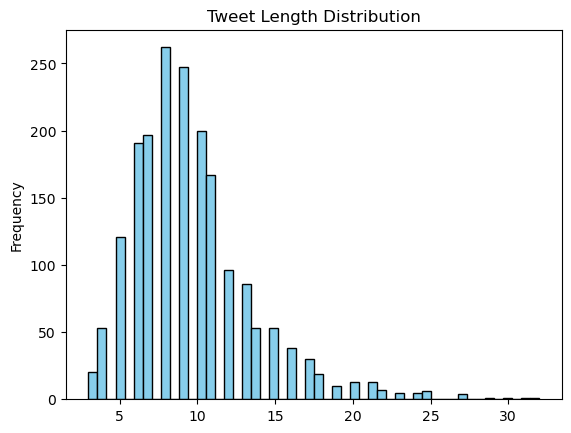

In [33]:
df['Length'].plot(kind='hist', bins=50, title='Tweet Length Distribution', color='skyblue', edgecolor='black')

In [34]:
df.isnull().sum()

ID                0
News              0
Label             0
hashtag_count     0
mentions_count    0
url_count         0
dollar_count      0
Length            0
dtype: int64

In [35]:
def countplot(fig_x,fig_y,col,top_x,rotation,xlabel,title) :
    plt.figure(figsize=(fig_x,fig_y))
    total = float(len(df))
    ax = sns.countplot(x=col,  data=df, order = df[col].value_counts().iloc[:top_x].index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y),xytext = (x+0.05,y+20),ha = 'center',weight = 'bold',size = 11)
    plt.xticks(rotation = rotation,weight='bold',size = 10)
    plt.yticks(weight='bold',size = 10)
    plt.xlabel(xlabel,weight='bold',size = 12)
    plt.ylabel('count',weight='bold',size = 12)
    plt.title(title,weight='bold',size = 15)
    plt.show()

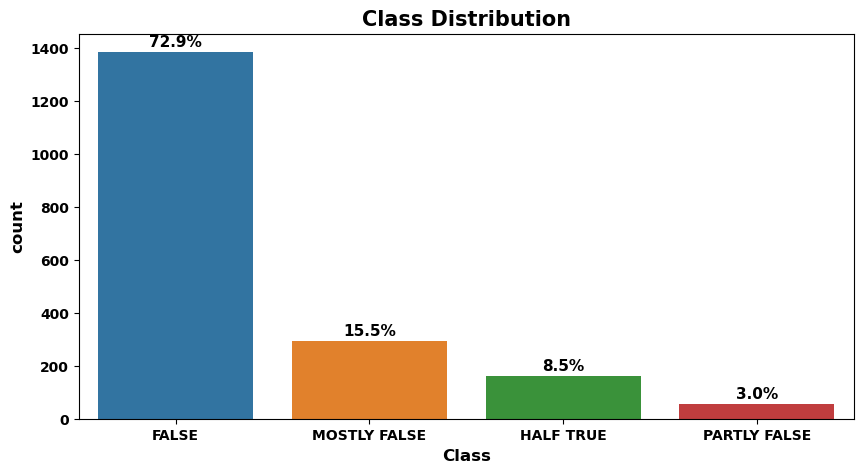

In [36]:
countplot(10,5,'Label',15,0,'Class','Class Distribution')

In [37]:
df.drop(columns=['hashtag_count', 'mentions_count', 'url_count', 'dollar_count','Length'], inplace=True)

In [38]:
test_df.drop(columns=['hashtag_count', 'mentions_count', 'url_count', 'dollar_count','Length'], inplace=True)

In [39]:
df.columns

Index(['ID', 'News', 'Label'], dtype='object')

In [40]:
df.head()

,ID,News,Label
0,FAKE_MAL_TR_0001,കേള്‍വി തകരാറുള്ള കുട്ടികള്‍ക്ക് നടത്തുന്ന സൗജ...,FALSE
1,FAKE_MAL_TR_0002,ചന്ദ്രയാന് കേരള മുഖ്യമന്ത്രി പിണറായി വിജയൻ മാത...,FALSE
2,FAKE_MAL_TR_0003,പിണറായി വിജയന്‍ സര്‍ക്കാര്‍ നിര്‍മിച്ച കേരളത്ത...,FALSE
3,FAKE_MAL_TR_0004,വിഴിഞ്ഞത്ത് തീരദേശവാസികള്‍ ആക്രമിച്ചപ്പോള്‍ മു...,FALSE
4,FAKE_MAL_TR_0005,കുരിശിന് മുന്നില്‍ കൈകൂപ്പി നില്‍ക്കുന്ന പിണറാ...,FALSE


In [41]:
test_df.head()

,S.no,News,Label
0,FAKE_MAL_TE_0001,കേരളത്തില്‍ പുരുഷന്മാര്‍ക്ക് രണ്ട് ഭാര്യമാര്‍ ...,False
1,FAKE_MAL_TE_0002,പാർട്ടിയുടെ കൊടിക്ക് മഹത്വം ഉണ്ടെന്നും സംരംഭങ്...,False
2,FAKE_MAL_TE_0003,നവകേരള സദസ്സ്: കാട്ടാക്കട ക്രിസ്ത്യൻ കോളേജ് കവ...,False
3,FAKE_MAL_TE_0004,ശബരിമലയില്‍ അയ്യപ്പ ഭക്തന്‍റെ തല പോലീസ് അടിച്ച...,False
4,FAKE_MAL_TE_0005,ബൈക്കുകള്‍ സ്വന്തം ജില്ലയില്‍ മാത്രം ഉപയോഗിക്ക...,False


In [42]:
df.to_csv("cleaned_train_multi.csv", index = False)
test_df.to_csv("cleaned_test_multi.csv", index = False)